# WeatherPy

Eric Staveley  MWSa

## Analysis

* As observed from the Latitude vs Wind Spped scatter plot, it appears that there is a slightly higher occurrence of winds over 15mph in the northern hemisphere, than found in the cities in the southern hemisphere.

* As observed from the latitude v Cloudiness scatter plt, it appears that there are interesting comon bands of "readings" at the 0%, 20%, 40%, ~75%, making it appear that these readings are somewhat subjective, and approximated by the measurement method.

* As observed from the LAtitude vs Max Temperature scatter plot, it is obvious that the max temperature increases as one approaches the equator, and at the time of this data mining (March in Austin, TX), the southern hemisphere is experiencing warmer temperatures, which makes sense, since it is "summer" below the equator at the present time.  

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
import datetime

# Import API (api_key) key from api_keys.py
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

#get current time
now = datetime.datetime.now()


## Generate Cities List

In [2]:
#Randomly select at least 500 unique (non-repeat) cities based on latitude and longitude.
#The city data is generated based on random coordinates; as such, 
#your outputs will not be an exact match to the provided starter notebook.

# List for holding lat_lngs and cities
lat_lngs = []
cities = []

#Latitude:  Y common var used
#Goes from -90 to +90 degrees
#0 latitude is the circle of the equator divding north from south

#Longitude    X common var used
#Goes from -180 when travelling west to +180 degrees when travelling east

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

#help(np.random.uniform)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
#len(cities)    # this is the number that citypy found a city for the lat/long.  for 1500 random, we got 500-600 cities

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
#type(cities)

In [4]:
#print(cities[0:10])

In [ ]:
# Save config information
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

#look at some sample info:
city = "London"    #get from our random city list list
samplequery_url = f"{url}appid={api_key}&units={units}&q={city}"     #see what it looks like
print(samplequery_url)
# Get weather data
sampleweather_response = requests.get(samplequery_url)
sampleweather_json = sampleweather_response.json()
#print(f"The weather API responded with: {sampleweather_json}.")



In [6]:
#print a pretty better json structure display:
#print(json.dumps(sampleweather_json, indent=4, sort_keys=True))

In [7]:
# Get the temperature_max from the response   degK  and observe server code
max_temp = sampleweather_json.get("main").get("temp_max")
#print(max_temp)

cod = sampleweather_json.get("cod")
#print(cod)

In [8]:
#real deal for looping here:
# Build partial query URL..city to be added later
query_url = f"{url}appid={api_key}&units={units}&q="
#print(query_url)

In [9]:
# Get weather data
#weather_response = requests.get(query_url)
#weather_json = weather_response.json()

#print(f"The weather API responded with: {weather_json}.")

In [10]:
#print a pretty better json structure display:
#print(json.dumps(weather_json, indent=4, sort_keys=True))

In [11]:
# Get the temperature_max from the response   degK
#weather_json.get("main").get("temp_max")

In [12]:
#print(query_url + city)    #test a link

In [13]:
# set up lists to hold reponse info
# already have lat and lng

cloudiness = []
country = []
date = []
humidity = []
max_temp = []
#data = []    # ALL the data from the response
wind_speed = []

foundcities = []   #define a new found list for our weather found cities
foundlat = []    # corresp lat for the found city
foundlong = []   # corresp longitude for the found city

# Loop through the list of cities and perform a request for data on each
#latlngcounter = 0
citycount = 1
citycountlimit = 520    # pulling in more than 500, to account for scrubbing of bad data
                        # like when humidiy > 100%, etc...

for city in cities:
    
    if citycount == citycountlimit + 1:
        print("Stopping at my defined count limit")
        break
    #cityurl = city.replace(" ", "%20")    #fix the space if present to be url friendly
    cityurl = city
    #print(query_url + cityurl)
    response = requests.get(query_url + cityurl).json()
    
    #watch out for stuff like this:
    #http://api.openweathermap.org/data/2.5/weather?appid=70d956e6a41ed69541b0c25e36cc51ef&units=imperial&q=tsihombe
    #{'cod': '404', 'message': 'city not found'}
    cod = response.get("cod") 
    #print(f"The cod response is: {cod}")
    
    # got a connection error we need to handle
    
    if cod == 200:
        
        #Get temperature (F) , Humidity (%), Cloudiness (%), WindSpeed (mph)
        
        #print(response)
        print(f"Processing Record {citycount} of {citycountlimit} for City: {city}")
        
        '''
        print(f"The city information received is: {city}")
        print(f"The cloudiness information received is: {response['clouds']['all']}")
        print(f"The country information received is: {response['sys']['country']}")
        print(f"The date information received is: {response['dt']}")
        print(f"The humidity information received is: {response['main']['humidity']}")
        print(f"The max_temp information received is: {response['main']['temp_max']}")
        print(f"The wind_speed information received is: {response['wind']['speed']}")
        print(f"The lat information received is: {response['coord']['lat']}")
        print(f"The long information received is: {response['coord']['lon']}")
        print("-----------------------")
        '''
        #make city name pretty in caps first letter, since i was drawing from first cities list
        #capcity = ' '.join(word[0].upper() + word[1:] for word in city.split())
        #print(capcity)
        
        #append to our lists
        #data.append(response)
        cloudiness.append(response['clouds']['all'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        humidity.append(response['main']['humidity'])
        max_temp.append(response['main']['temp_max'])
        wind_speed.append(response['wind']['speed'])
        
        #foundcities.append(capcity)      #my orig way that capitalized the cities from the orig list
      
        foundcities.append(response['name'])    #now grabbing from openweather, where cap is ok
        foundlat.append(response['coord']['lat'])
        foundlong.append(response['coord']['lon'])
              
       
        '''
        print(f"The city information list is now: {foundcities}")
        print(f"The cloudiness information list is now: {cloudiness}")
        print(f"The country information list is now: {country}")
        print(f"The date information list is now: {date}")
        print(f"The humidity information list is now: {humidity}")
        print(f"The max_temp information list is now {max_temp}")
        print(f"The wind_speed information list is now: {wind_speed}")
        print(f"The lat information list is now {foundlat}")
        print(f"The long information list is now: {foundlong}")
        '''
        
        #break     #review our data
              
        citycount = citycount + 1
        
    else:
        print(f"No weather data found for this city: {city}, weather server response code:{cod}")
     
            

Processing Record 1 of 520 for City: klaksvik
Processing Record 2 of 520 for City: half moon bay
Processing Record 3 of 520 for City: port elizabeth
Processing Record 4 of 520 for City: dikson
Processing Record 5 of 520 for City: ushuaia
Processing Record 6 of 520 for City: kapaa
No weather data found for this city: barentsburg, weather server response code:404
Processing Record 7 of 520 for City: chimore
Processing Record 8 of 520 for City: hilo
Processing Record 9 of 520 for City: port hawkesbury
Processing Record 10 of 520 for City: chokurdakh
Processing Record 11 of 520 for City: husavik
Processing Record 12 of 520 for City: hermanus
Processing Record 13 of 520 for City: cherskiy
No weather data found for this city: belushya guba, weather server response code:404
Processing Record 14 of 520 for City: norman wells
Processing Record 15 of 520 for City: nyurba
Processing Record 16 of 520 for City: geraldton
Processing Record 17 of 520 for City: fortuna
Processing Record 18 of 520 for 

Processing Record 144 of 520 for City: poum
Processing Record 145 of 520 for City: college
Processing Record 146 of 520 for City: cap-aux-meules
Processing Record 147 of 520 for City: yar-sale
Processing Record 148 of 520 for City: springdale
Processing Record 149 of 520 for City: chapais
Processing Record 150 of 520 for City: mahon
Processing Record 151 of 520 for City: sechura
Processing Record 152 of 520 for City: nizwa
Processing Record 153 of 520 for City: fort erie
Processing Record 154 of 520 for City: zhigansk
Processing Record 155 of 520 for City: saint-philippe
Processing Record 156 of 520 for City: tiarei
Processing Record 157 of 520 for City: havoysund
Processing Record 158 of 520 for City: sao joao da barra
Processing Record 159 of 520 for City: puerto leguizamo
Processing Record 160 of 520 for City: mogok
Processing Record 161 of 520 for City: namatanai
Processing Record 162 of 520 for City: wagar
Processing Record 163 of 520 for City: aykhal
Processing Record 164 of 520 

Processing Record 283 of 520 for City: batemans bay
Processing Record 284 of 520 for City: katsuura
Processing Record 285 of 520 for City: vanavara
Processing Record 286 of 520 for City: mamallapuram
Processing Record 287 of 520 for City: bakchar
Processing Record 288 of 520 for City: maragogi
Processing Record 289 of 520 for City: glenluce
Processing Record 290 of 520 for City: wajima
Processing Record 291 of 520 for City: clyde river
Processing Record 292 of 520 for City: mildura
Processing Record 293 of 520 for City: kalmunai
Processing Record 294 of 520 for City: isangel
Processing Record 295 of 520 for City: tura
Processing Record 296 of 520 for City: mangrol
Processing Record 297 of 520 for City: port-gentil
Processing Record 298 of 520 for City: itoigawa
Processing Record 299 of 520 for City: biak
Processing Record 300 of 520 for City: san pedro
No weather data found for this city: nguiu, weather server response code:404
Processing Record 301 of 520 for City: road town
Processin

Processing Record 418 of 520 for City: ilyich
Processing Record 419 of 520 for City: bezerros
Processing Record 420 of 520 for City: pori
Processing Record 421 of 520 for City: lata
Processing Record 422 of 520 for City: troitsk
Processing Record 423 of 520 for City: varzea da palma
Processing Record 424 of 520 for City: thunder bay
Processing Record 425 of 520 for City: merauke
Processing Record 426 of 520 for City: maniitsoq
Processing Record 427 of 520 for City: trujillo
Processing Record 428 of 520 for City: teknaf
Processing Record 429 of 520 for City: tulun
Processing Record 430 of 520 for City: olinda
Processing Record 431 of 520 for City: hennigsdorf
Processing Record 432 of 520 for City: zakamensk
Processing Record 433 of 520 for City: kashkhatau
No weather data found for this city: one hundred mile house, weather server response code:404
Processing Record 434 of 520 for City: kingsland
Processing Record 435 of 520 for City: maceio
Processing Record 436 of 520 for City: plette

In [14]:
#the mother df
#df = pd.DataFrame(data)
#df.head

In [15]:
#df["lat"] = df["coord"].map(lambda x: x["lat"])

In [ ]:
#df.head()
print("Num of elements in each list:")
print(len(foundcities))
print(len(cloudiness))
print(len(country))
print(len(date))
print(len(humidity))
print(len(max_temp))
print(len(wind_speed))
print(len(foundlat))
print(len(foundlong))


In [17]:
### Convert Raw Data to DataFrame

#make a df with City, Cloudiness, Country, Date, Humidity, Lat, Long, Max Temp, Wind Speed
weather_dict = {
    "City": foundcities,
    "Country" : country,
    "Cloudiness" : cloudiness,
    "Date" : date,
    "Humidity" : humidity,
    "Lat" : foundlat,
    "Lng" : foundlong,
    "Max Temp" : max_temp,
    "Wind Speed" : wind_speed
}
raw_weather_data_df = pd.DataFrame(weather_dict)
#raw_weather_data_df.head(10)

In [18]:
# remove bad data, like if humidity > 100%, like what was found during development:
#noticed while developing, the humidity value for city San Jose de Sisa came in for date 
#1551488400 at 290.  So, this inspired me to install a sanity check routine for no humidity over 100

#remove >100 humidity or negative humidity, if present
row_condition = raw_weather_data_df["Humidity"] <= 100
filtered_df = raw_weather_data_df.loc[row_condition]
row_condition = filtered_df["Humidity"] >= 0
filtered_df = filtered_df.loc[row_condition]

#remove negative wind speeds, if present
row_condition = filtered_df["Wind Speed"] >= 0
filtered_df = filtered_df.loc[row_condition]

#remove cloudiness < 0
row_condition = filtered_df["Cloudiness"] >= 0
filtered_df = filtered_df.loc[row_condition]

fnl_weather_data_df = filtered_df

print(f"filtered_df length={len(filtered_df)},  weather_data_df length={len(fnl_weather_data_df)}")
filtered_df.head()

filtered_df length=520,  weather_data_df length=520


,City,Country,Cloudiness,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Klaksvik,FO,64,1551500400,93,62.23,-6.59,44.60,9.17
1,Half Moon Bay,US,90,1551502932,66,37.46,-122.43,55.40,6.51
2,Port Elizabeth,US,90,1551502725,100,39.31,-74.98,39.00,9.17
3,Dikson,RU,68,1551502942,97,73.51,80.55,-0.55,12.55
4,Ushuaia,AR,75,1551499200,93,-54.81,-68.31,48.20,4.70


In [19]:
# Export file as a CSV, without the Pandas index, but with the header
fnl_weather_data_df.to_csv("output_data/city_weather.csv", index=False, header=True)


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

In [25]:
def plotvslatitude(inputlist):
    
    if inputlist == "Max Temp":
        ylabeltxt = "Max Temperature (Farenheit)"
        titlesub = "Max Temperature"
        filenamesub = "MaxTemperature"
    elif inputlist == "Humidity":
        titlesub = inputlist
        ylabeltxt = "Humidity (%)"
        filenamesub = "Humidity"
    elif inputlist == "Cloudiness":
        titlesub = inputlist
        ylabeltxt = "Cloudiness (%)"
        filenamesub = "Cloudiness"
    elif inputlist == "Wind Speed":
        titlesub = inputlist
        ylabeltxt = "Wind Speed (mph)"
        filenamesub = "WindSpeed"
    
    
    
    # Build a scatter plot for each data type
    plt.scatter(fnl_weather_data_df["Lat"], fnl_weather_data_df[inputlist], marker="o")

    # Incorporate the other graph properties
    todaydate = now.strftime("%m/%d/%Y")
    plt.title("City Latitude vs " + titlesub + " (" + todaydate + ")")
    plt.ylabel(ylabeltxt)
    plt.xlabel("Latitude")
    plt.grid(True)

    # Save the figure
    plt.savefig("output_data/LatitudeBy" + filenamesub + "ScatterPlotWorldCities.png")

    # Show plot
    plt.show()
    
    
    

#### Latitude vs. Temperature Plot

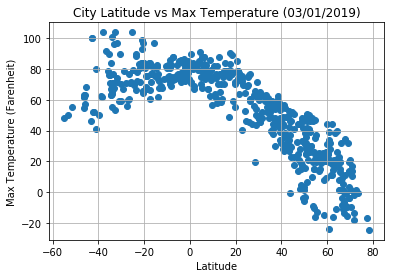

In [26]:
#call function to plot latitude vs max_temp 
plotvslatitude("Max Temp")

#### Latitude vs. Humidity Plot

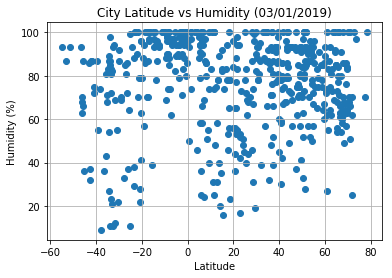

In [27]:
#call function to plot latitude vs humidity
plotvslatitude("Humidity")

#### Latitude vs. Cloudiness Plot

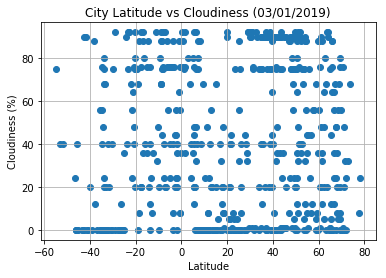

In [28]:
#call function to plot latitude vs cloudiness
plotvslatitude("Cloudiness")

#### Latitude vs. Wind Speed Plot

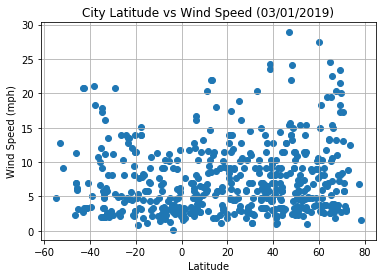

In [29]:
#call function to plot latitude vs wind speed
plotvslatitude("Wind Speed")